In [1]:
# BASIC & PANDAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# SKLEARN & MODELING
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv("Telecom_churn.csv")

In [3]:
# df['p_number'] = df['area code'].astype(str) + df['phone number']
# df['p_number'] = df['p_number'].str.replace('-','')
# df['p_number'] = df['p_number'].astype(int)

In [4]:
df['international plan']= df['international plan'].str.replace('no',"0")
df['international plan']= df['international plan'].str.replace('yes',"1")
df['voice mail plan']= df['voice mail plan'].str.replace('no',"0")
df['voice mail plan']= df['voice mail plan'].str.replace('yes',"1")

In [5]:
df['international plan'] = df['international plan'].astype(int)
df['voice mail plan'] = df['voice mail plan'].astype(int)

In [6]:
df['target'] = df['churn'].astype(int)

In [7]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'target'],
      dtype='object')

In [8]:
cat_col = ['state','area code']
num_col = ['account length','international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
used_col = cat_col + num_col

In [9]:
X = df[used_col]
y = df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=8)

In [11]:
imputer = SimpleImputer(strategy='median')
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols = cat_col, handle_missing = 'value')

In [12]:
num_transform = make_pipeline(imputer,scaler)
cat_transform = make_pipeline(encoder)

ColTransform = ColumnTransformer(transformers = [('num',num_transform, num_col),
                                                ('cat',cat_transform, cat_col)])

In [13]:
model = LogisticRegression(class_weight="balanced")
pipe = make_pipeline(ColTransform,model)

In [14]:
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

In [15]:
confusion_matrix(y_test,test_preds)

array([[547, 162],
       [ 31,  94]])

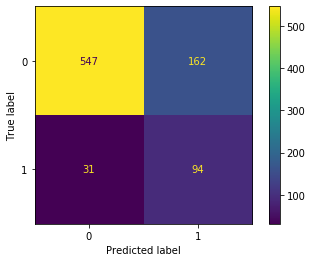

In [16]:
plot_confusion_matrix(pipe, X_test, y_test,
                     values_format=".3g")
plt.grid(False)
plt.show()

In [17]:
print(f'TRAIN Accuracy: {accuracy_score(y_train, train_preds)}')
print(f'TEST Accuracy: {accuracy_score(y_test, test_preds)}')

print(f'TRAIN ROC_AUC: {roc_auc_score(y_train, train_preds)}')
print(f'Test ROC_AUC: {roc_auc_score(y_test, test_preds)}')

TRAIN Accuracy: 0.7839135654261705
TEST Accuracy: 0.7685851318944844
TRAIN ROC_AUC: 0.7820048324935615
Test ROC_AUC: 0.7617545839210155


**W/O Balance

* TRAIN Accuracy: 0.8687474989995998
* TEST Accuracy: 0.8561151079136691
* TRAIN ROC_AUC: 0.602381281654529
* Test ROC_AUC: 0.5661269393511988

**W/ Balance

* TRAIN Accuracy: 0.7839135654261705
* TEST Accuracy: 0.7685851318944844
* TRAIN ROC_AUC: 0.7820048324935615
* Test ROC_AUC: 0.7617545839210155